# Importaciones y procesamiento instancias

In [1]:
# IMPORTAR LIBRERÍAS
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# LECTURA DE ARCHIVOS

# FUNCIÓN PARA LEER ARCHIVOS
def read_graph_from_file(filename):
    graph = nx.read_gml(filename)
    new_labels = {node: int(node) for node in graph.nodes()}
    graph = nx.relabel_nodes(graph, new_labels)
    return graph

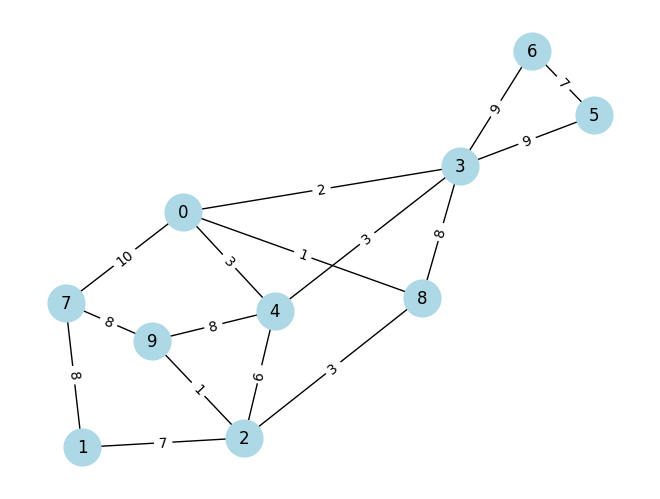

In [3]:
# LECTURA DEL GRAFO
graph_filename = 'Instancias_T3\Grafo.gml'
G = read_graph_from_file(graph_filename)

# Dibujar el grafo
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Parte I

- $\alpha$: costo del largo total del tubería por distancia $[\frac{costo}{metros}] \rightarrow$ lo multiplico por el largo del árbol de rutas mínimas $\rightarrow$ calculo el costo de usar cada arco del árbol de rutas mínimas y eso lo multiplico por $\alpha$.
- $\beta$: costo del largo total de cables que se instalan $[\frac{costo}{metros}] \rightarrow$ lo multiplico por la suma de los costos de todas las rutas mínimas $\rightarrow$ a cada ruta minima le calculo el costo y eso lo multiplico por $\beta$.

- si $\alpha = 0 \rightarrow$ el unico costo que importa es el costo total de los cables, es decir, el costo total de enviar flujo por todas las rutas mínimas desde la raiz del árbol, en este caso nos conviene hacer **Dijkstra**, pero probando todas las posibles rutas?
- si $\beta = 0 \rightarrow$ el único costo que importa es el costo total de la tubería, es decir, la sumatoría de los costos de los arcos del arbol de rutas mínimas, en este caso nos conviene hacer **Prim**.

In [64]:
def alpha_dist_0(alpha, G):
    AMEM_G = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')
    AMEM_G_costos = sum(d['weight'] for u, v, d in AMEM_G.edges(data=True))

    print(f'El costo de la solución óptima es {AMEM_G_costos*alpha}')
    return AMEM_G

def beta_dist_0(beta, G) -> list:
    # Calculamos todos los caminos más cortos entre pares de nodos usando los pesos
    costos = []

    RM_all_pairs = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))

    # Calculamos los costos de los caminos más cortos entre pares de nodos usando los pesos
    RM_all_pairs_costo = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

    for source, costs in RM_all_pairs_costo.items():
        costos.append(sum(costs.values()))

    costo_min_index = costos.index(min(costos))              # NODO DEL DICCIONARIO DE RUTAS OPTIMA DE DIJKSTRA QUE TIENE MENOR COSTO TOTAL
    costo_min = sum(RM_all_pairs_costo[costo_min_index].values())

    ruta_optima = RM_all_pairs_costo[costo_min_index]

    print(f'El costo de la solución óptima es {costo_min*beta}')
    
    return RM_all_pairs[costo_min_index]

In [67]:
def elegir_algoritmo(alpha: int, beta: int, G: nx.Graph) -> nx.Graph:
    if type(alpha) is int and type(alpha) is int:
        if alpha>=0 and beta>=0:
            print(f'ejecutamos el algoritmno para: beta={beta}, alpha={alpha}')
            if alpha == 0 and beta == 0:
                print('NO IMPORTA EL COSTO, HAGA LO QUE QUIERA')
            
            elif alpha == 0 and beta != 0:
                return beta_dist_0(beta, G)
            
            elif alpha != 0 and beta == 0:
                print('ejecutamos el algoritmo beta0')
                return alpha_dist_0(alpha, G)
                
            else:
                print('se resolverá en la parte 2')
        
        else:
            if alpha < 0:
                print(f'no se puede ejecutar el algoritmo?')
        
            else:
                print(f'no se puede ejecutar el algoritmo?')
            
    else:
        if type(alpha) is not int:
            print(f'ingrese un valor numérico para alpha')
        
        else:
            print(f'ingrese un valor numérico para beta')

In [83]:
def graficar_alpha_0(sol_alpha0: list) -> plt.plot:
    # Creamos un grafo multidigrafo para visualizar arcos paralelos
    M = nx.MultiDiGraph()

    # Añadimos los caminos al MultiDiGraph con arcos paralelos
    for target, path in sol_alpha0.items():
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            weight = G[u][v]['weight']
            M.add_edge(u, v, weight=weight, path=path)

    # Dibujamos el grafo original en gris
    nx.draw(G, pos, with_labels=True, node_color='lightgrey', node_size=700, font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

    # Dibujamos los caminos más cortos desde el nodo 0 en colores distintos para cada destino
    colors = plt.cm.rainbow(np.linspace(0, 1, len(sol_alpha0)))

    cont = 0

    for color, (target, path) in zip(colors, sol_alpha0.items()):
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

        # Etiquetas de los arcos
        nx.draw_networkx_edge_labels(M, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in path_edges})

        # Desplazamiento para arcos paralelos
        for i, (u, v) in enumerate(path_edges):
            nx.draw_networkx_edges(M, pos, edgelist=[(u, v)], edge_color=[color], width=2,
                                        connectionstyle='arc3,rad='+str(-0.1*cont))    
        cont +=1

    plt.show()

In [84]:
def graficar_beta_0(sol: nx.Graph):
    # Minimum spanning tree = AMEM
    sol = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')

    # Dibujamos el grafo
    plt.subplots(1,2)

        # GRAFO ORIGINAL
    plt.subplot(1,2,1)
    pos = nx.spring_layout(G, seed = 1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Red G')

        # ÁRBOL DE RUTAS MÍNIMAS

    plt.subplot(1,2,2)

    nx.draw(sol, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=15)
    nx.draw_networkx_edge_labels(sol, pos, edge_labels={(u, v): d['weight'] for u, v, d in sol.edges(data=True)})
    plt.title('Árbol de rutas mínimas de G')

    plt.tight_layout()
    plt.show()

ejecutamos el algoritmno para: beta=10, alpha=0
El costo de la solución óptima es 580


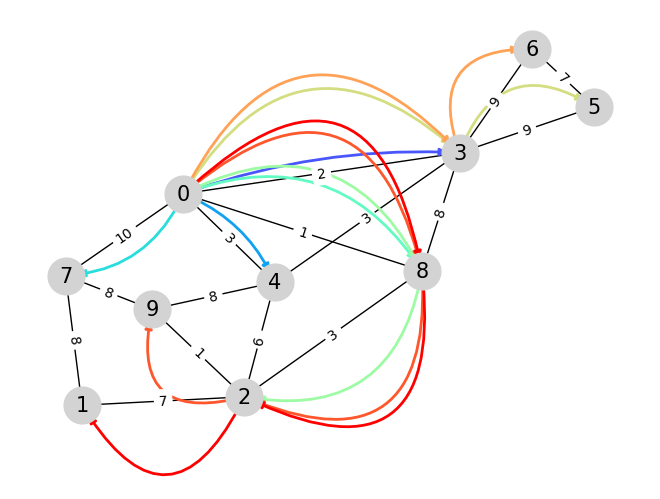

In [85]:
alpha = 0
beta = 10

sol = elegir_algoritmo(alpha, beta, G)

if alpha==0 and beta!=0:
    graficar_alpha_0(sol)

elif alpha!=0 and beta==0:
    graficar_beta_0(sol)

else:
    print('solucion de la parte 2')

In [ ]:
plt.subplot(1,2,1)
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Red G')